Riya & Austin<br/>Section 3

# Question

### What would happen if Olin students kept coming to class during an meningococcal meningitis outbreak?

# Model

### Setting up the environment

In [117]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
import matplotlib.pyplot as plt


# import functions from the modsim.py module
from modsim import *

In [118]:
'''
S: Susceptible
Q: Quarantine
C: Coming to class
R: Recovered
D: Dead XP
'''

init = State(S=360, Q=0, C=2, R=0, D=0)

,values
S,360
Q,0
C,2
R,0
D,0


In [128]:
'''
i: contagion rate
p: proportion quarantined
alpha: quarantined recovery rate
beta: quarantined death rate
'''

system = System(
    i=0.1 * 5/24 * 25,
    g=0.07,
    alpha=0.4,
    beta=0.1,
)

,values
i,0.520833
p,0.300000
g,0.070000
alpha,0.400000
beta,0.100000
gamma,0.001000
sigma,0.500000


In [130]:
def update_func(state, system, dt=1):
    unpack(state)
    unpack(system)
    
    if S <= 0:
        delta = 0
    else:
        delta = i/S

    infections = min([S * C * delta, S])
    recoveries = min([Q*alpha, 360])
    deaths     = min([Q*beta, 360])
    
    
    dSdt = -infections * dt
    dCdt = (infections - C*g) * dt
    dQdt = (C*g - Q*alpha - Q*beta) * dt
    dRdt = (recoveries) * dt
    dDdt = (deaths) * dt
    
    s,q,c,r,d = S,Q,C,R,D
    
    return State(
        S = s + dSdt,
        Q = q + dQdt,
        C = c + dCdt,
        R = r + dRdt,
        D = d + dDdt
    )

In [131]:
def run_simulation(system, init, t_end, dt):
    unpack(system)
    
    results = TimeFrame(columns=init.index)
    results.row[0] = init
    
    for t in linrange(0, t_end, dt):
        results.row[t+dt] = update_func(results.row[t], system, dt)
    
    return results

In [135]:
def plot_results(results):
    plot(results['S'], '-', label='Susceptible')
    plot(results['C'], '--', label='Coming to class')
    plot(results['Q'], ':', label='Quarantined')
    plot(results['R'], '.-', label='Recovered')
    plot(results['D'], '.--', label='Dead')
    decorate(xlabel='Time (days)', ylabel='Population')

          S         Q        C         R          D
0       360         0        2         0          0
1   358.958      0.14  2.90167         0          0
2   357.447  0.273117  4.20983     0.056      0.014
3   355.254  0.431247  6.10777  0.165247  0.0413117
4   352.073  0.643167  8.86135  0.337745  0.0844363
5   347.458  0.941878  12.8563  0.595012   0.148753
6   340.762   1.37088  18.6524  0.971764   0.242941
7   331.047   1.99111  27.0616   1.52012   0.380029
8   316.953   2.88986  39.2618   2.31656    0.57914
9   296.504   4.19326  56.9623   3.47251   0.868127
10  266.836   6.08399  82.6428   5.14981    1.28745
11  223.793   8.82699  119.901   7.58341    1.89585
12  161.344   12.8066  173.956   11.1142    2.77855
13  70.7421   18.5802  252.382   16.2368    4.05921
14        0   26.9568  305.457   23.6689    5.91723
15        0   34.8604  284.075   34.4517    8.61291
16        0   37.3155   264.19   48.3958     12.099
17        0    37.151  245.696    63.322    15.8305
18        0 

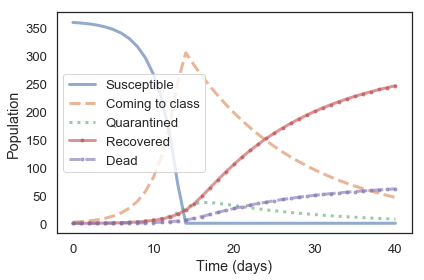

In [136]:
results = run_simulation(system, init, 40, 1)
plot_results(results)
print(results)

# Results

In [ ]:
"""
peeps amount don't matter
"""

# Interpretation